# Preprocessing: Data Scaling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from wrangle import clean_and_convert, train_val_test, compare_data, quantiletransformer, scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
#importing the get_get_properties_2017 function as df
df = clean_and_convert()
df.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [3]:
#splitting the data into train, val and test
train, val, test = train_val_test(df)
train.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips
1007466,3,2,1452,241012,1980,2974,6037
615622,3,2,1262,235630,1953,3029,6037
662507,3,1,1447,435123,1947,5226,6037
840040,3,2,1403,268770,1965,2849,6111
243798,3,2,1456,365000,1961,4582,6037


### MinMaxScaler

In [4]:
# Create a MinMaxScaler instance
mms = MinMaxScaler()

# Fit the MinMaxScaler on the training data's 'tax_value' column
mms.fit(train[['tax_value']])

MinMaxScaler()

In [5]:
# Apply the MinMaxScaler transformation to the 'tax_value' column and create a new column 'tax_value_mms'
train['tax_value_mms'] = mms.transform(train[['tax_value']])
 
# Display the first few rows of the DataFrame
train.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips,tax_value_mms
1007466,3,2,1452,241012,1980,2974,6037,0.002672
615622,3,2,1262,235630,1953,3029,6037,0.002612
662507,3,1,1447,435123,1947,5226,6037,0.004824
840040,3,2,1403,268770,1965,2849,6111,0.002980
243798,3,2,1456,365000,1961,4582,6037,0.004047


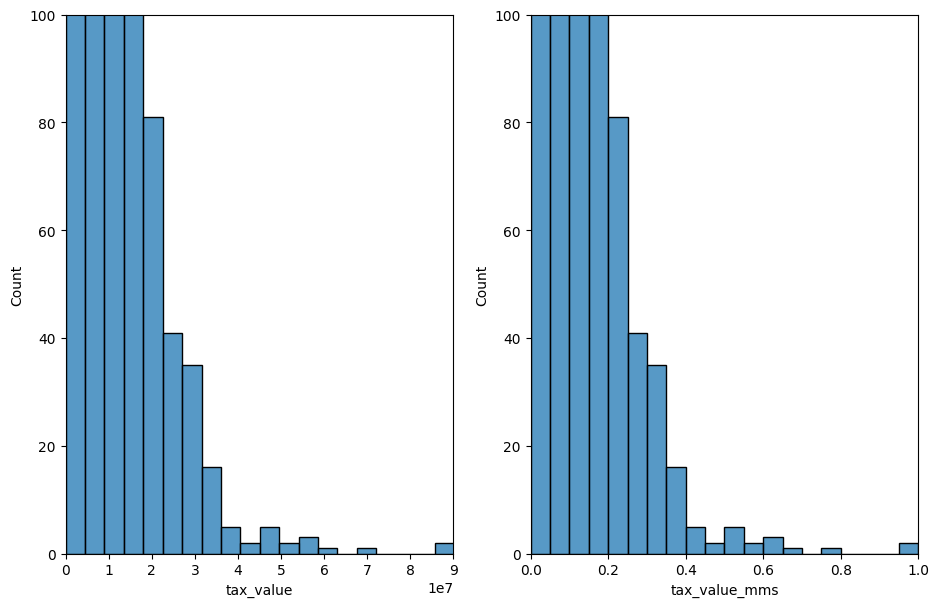

In [6]:
compare_data('tax_value_mms', x_lim = 1, df = train )

In [7]:
mms = MinMaxScaler()

mms.fit(train[['squarefeet', 'tax_amount']])

train[['squarefeet', 'tax_amount']] = mms.transform(train[['squarefeet', 'tax_amount']])

train.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips,tax_value_mms
1007466,3,2,0.001523,241012,1980,0.002747,6037,0.002672
615622,3,2,0.001324,235630,1953,0.002798,6037,0.002612
662507,3,1,0.001518,435123,1947,0.004835,6037,0.004824
840040,3,2,0.001472,268770,1965,0.002631,6111,0.002980
243798,3,2,0.001527,365000,1961,0.004238,6037,0.004047


### StandardScaler

In [8]:
ss = StandardScaler()

ss.fit(train[['tax_value']])

StandardScaler()

In [9]:
train['tax_value_ss'] = ss.transform(train[['tax_value']])

train.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips,tax_value_mms,tax_value_ss
1007466,3,2,0.001523,241012,1980,0.002747,6037,0.002672,-0.322874
615622,3,2,0.001324,235630,1953,0.002798,6037,0.002612,-0.330791
662507,3,1,0.001518,435123,1947,0.004835,6037,0.004824,-0.037331
840040,3,2,0.001472,268770,1965,0.002631,6111,0.002980,-0.282041
243798,3,2,0.001527,365000,1961,0.004238,6037,0.004047,-0.140484


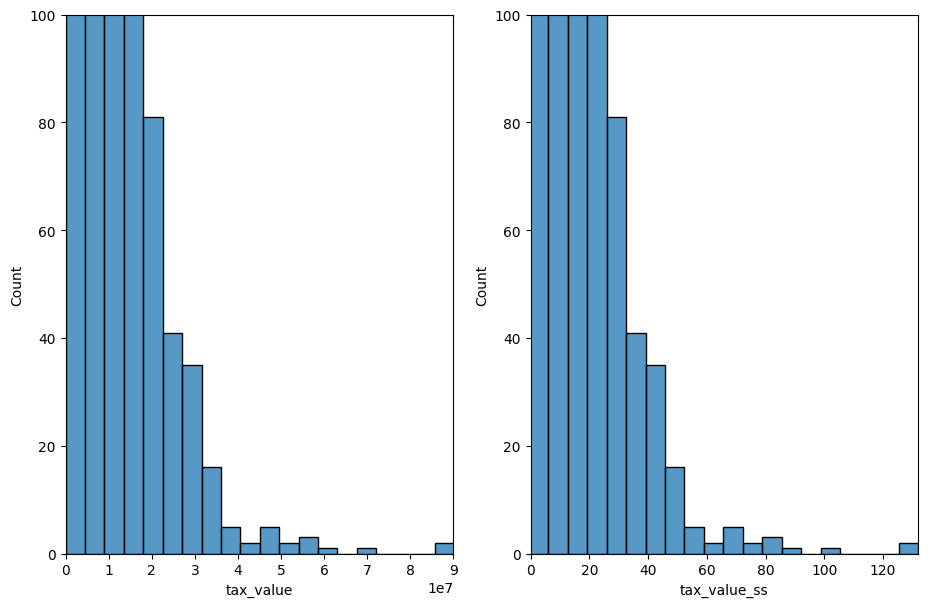

In [10]:
compare_data('tax_value_ss', x_lim = 132, df = train)

### RobustScaler

In [11]:
#Create an instance of the RobustScaler object
rs = RobustScaler()

#Fit the object to our desired column
rs.fit(train[['tax_value']])

RobustScaler()

In [12]:
#Transform the features and assign to a new column
train['tax_value_rs'] = rs.transform(train[['tax_value']])

#Did it work
train.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips,tax_value_mms,tax_value_ss,tax_value_rs
1007466,3,2,0.001523,241012,1980,0.002747,6037,0.002672,-0.322874,-0.252086
615622,3,2,0.001324,235630,1953,0.002798,6037,0.002612,-0.330791,-0.267681
662507,3,1,0.001518,435123,1947,0.004835,6037,0.004824,-0.037331,0.310368
840040,3,2,0.001472,268770,1965,0.002631,6111,0.002980,-0.282041,-0.171655
243798,3,2,0.001527,365000,1961,0.004238,6037,0.004047,-0.140484,0.107181


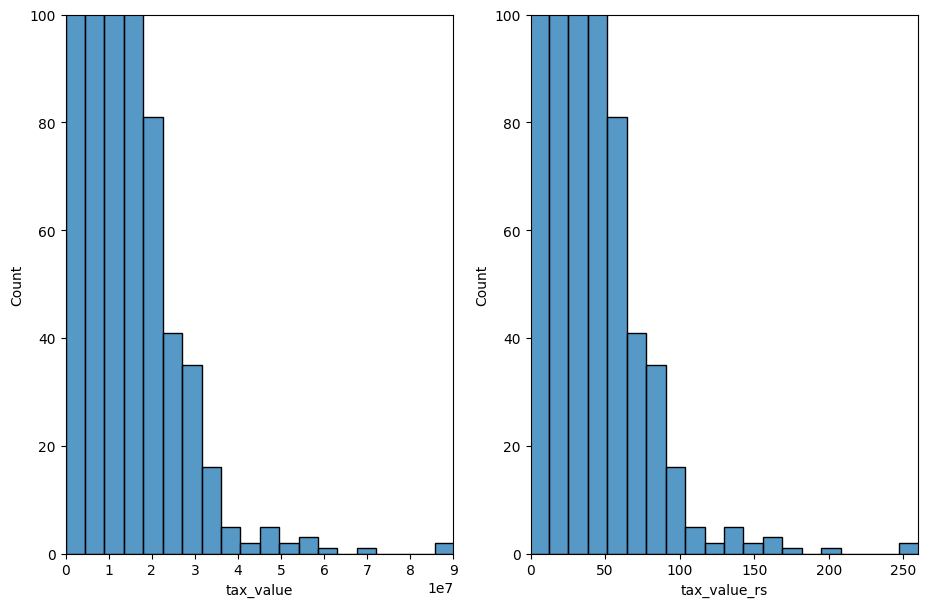

In [13]:
compare_data('tax_value_rs', x_lim = 260, df = train)

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [14]:
# Create the MinMaxScaler
mms = MinMaxScaler()

# Fit the scaler to the original data
mms.fit(train)

# Transform the entire original data (all columns)
scaled_data = mms.transform(train)

# Now you can inverse transform the entire scaled data
original_data_restored = mms.inverse_transform(scaled_data)
to_scale = ['bedrooms', 'bathrooms', 'squarefeet', 'tax_value', 'year_built', 'tax_amount', 'fips', 'tax_value_mms', 'tax_value_ss', 'tax_value_rs']

In [15]:
pd.DataFrame(original_data_restored,  columns=to_scale).head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips,tax_value_mms,tax_value_ss,tax_value_rs
0,3.0,2.0,0.001523,241012.0,1980.0,0.002747,6037.0,0.002672,-0.322874,-0.252086
1,3.0,2.0,0.001324,235630.0,1953.0,0.002798,6037.0,0.002612,-0.330791,-0.267681
2,3.0,1.0,0.001518,435123.0,1947.0,0.004835,6037.0,0.004824,-0.037331,0.310368
3,3.0,2.0,0.001472,268770.0,1965.0,0.002631,6111.0,0.002980,-0.282041,-0.171655
4,3.0,2.0,0.001527,365000.0,1961.0,0.004238,6037.0,0.004047,-0.140484,0.107181


3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

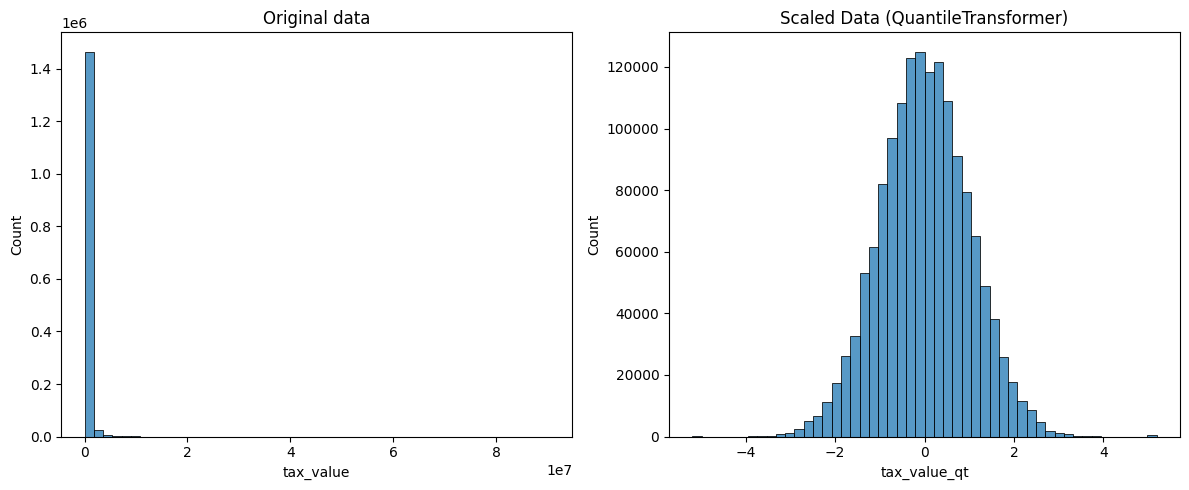

In [16]:
# Calling the QuantileTransformer function with 'normal' output distribution.
quantiletransformer(output_distribution='normal', train=train)

4) Use the QuantileTransformer, but omit the output_distribution argument.  
   Visualize your results. What do you notice?

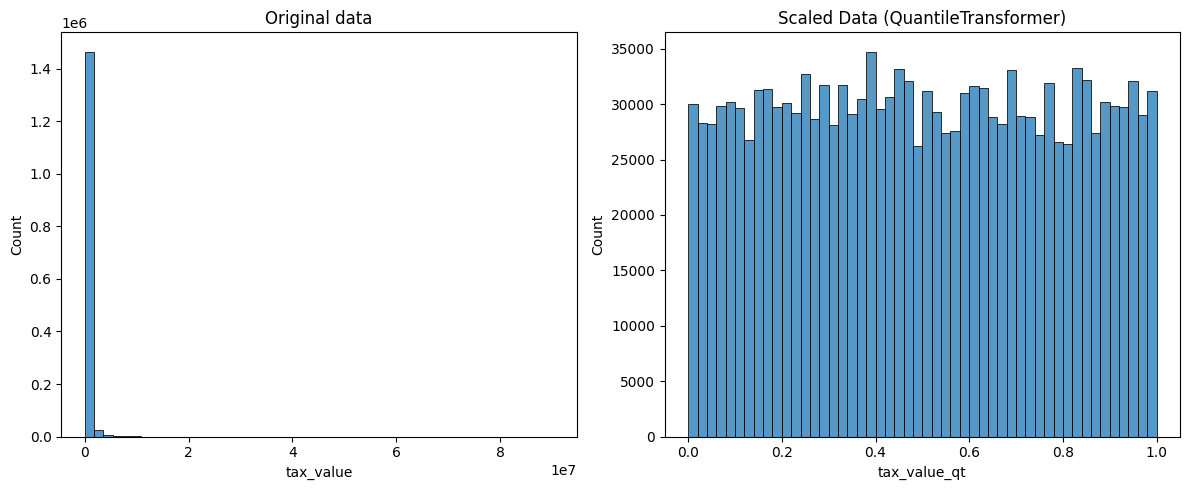

In [17]:
# Calling the QuantileTransformer function with no output distribution
quantiletransformer(train=train)

5) Based on the work you've done, choose a scaling method for your dataset.  
   Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each.  
    Be sure to only learn the parameters for scaling from your training data!

In [18]:
train, val, test = train_val_test(df)

In [19]:
train, val, test = scale(train=train, val=val, test=test)

In [20]:
train.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips
1007466,3,2,0.024502,0.003422,1980,0.003529,6037
615622,3,2,0.021294,0.003346,1953,0.003594,6037
662507,3,1,0.024418,0.006179,1947,0.006207,6037
840040,3,2,0.023675,0.003817,1965,0.003380,6111
243798,3,2,0.024570,0.005183,1961,0.005441,6037


In [21]:
val.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips
688607,3,2,0.024097,0.003084,1986,0.003509,6059
459113,2,1,0.014657,0.001944,1921,0.002133,6037
68307,1,1,0.011736,0.006589,1924,0.006689,6037
107238,3,3,0.037927,0.006576,2003,0.007368,6037
338606,3,2,0.026140,0.004814,1947,0.007045,6037


In [22]:
test.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips
612130,4,3,0.049511,0.012111,1975,0.010795,6059
1549498,4,3,0.035799,0.004182,1991,0.003429,6059
1665091,3,3,0.025718,0.005882,1984,0.007316,6037
1823967,4,2,0.029990,0.006922,1942,0.006919,6037
964615,5,3,0.050068,0.021410,1977,0.020050,6037
